## Chapter 4 -  Training Models

### Regularised Linear Models

A good wary to reduce overfitting is to regularise the model (to constrain it). The fewer degrees of freedom the model has, the harder it will be to overfit the data. As seen earlier, one way to regularise a model is to reduce the number of polynomial degrees.

There are other ways to regularise the model, in particular constraining the weights of the model. Three ways to do so are Ridge regression, Lasso regression and Elastic Net.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Ridge Regression

In Ridge Regression, a regularisation term equal to $\alpha \sum_{t=1}^n \theta_t^2$ is added to the cost function. Recall that the cost function is the MSE:

$$\text{MSE} (\Theta) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{bmatrix}^2$$

(ISTL 6.2.1) We use the RSS, where $\frac 1m \text{RSS} = \text{MSE}$. So 

$$\text{RSS} (\Theta) = \sum_{i=1}^m \begin{pmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{pmatrix}^2$$

The cost function , $J(\Theta)$ with the regularisation term, in terms of RSS is:

$$\begin{align}J(\Theta) &= \text{RSS} (\Theta) + \alpha \sum_{t=1}^n \theta_t^2 \\&= \sum_{i=1}^m \begin{pmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{pmatrix}^2  + {\alpha} \sum_{t=1}^n \theta_t^2\end{align}$$

The hyperparameter $\alpha$ controls how much to regularise the model. The penalty term $\alpha \sum_{t=1}^n \theta_t^2$ is called the shrinkage penalty. This shrinkage penalty has an effect of shrinking the estimates $\theta_1, \cdots, \theta_n$ to $0$. 

When $\alpha=0$, this penalty term is $0$. There is no expected shrinkage effect the $\Theta$ estimates for for Ridge Regression is the same as Linear Regression. The coefficients are optimised at the lowest RSS.

As $\alpha$ grows, the shrinkage penalty kicks in and the effect of the $\theta_i$ starts to shrink to zero. When $\alpha \rightarrow \infty$, the impact of the shrinkage penalty becomes very large, causing the ridge regression coefficient estimates approach zero. Consequently, different values of $\alpha$ will produce different $\Theta$ estimates. Note that the bias term $\theta_0$ is not regularized. 

If we define $\mathbf w$ as the feature weights then the regularisation term is simply $\frac12(||\mathbf w||_2)^2$ where $||\mathbf w||$ is the $l_2$ norm of the weight vector.

In [2]:
# Generate y = 4X with noise
m = 100
X = np.random.normal(30,10,m).flatten()
X_b = np.c_[np.ones((m,1)), X]
y = 4*X + np.random.normal(0,25,m).flatten()
df_Xy = pd.DataFrame({'X' : X, 'y' : y})

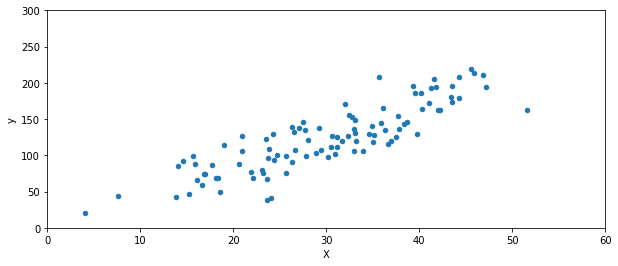

In [3]:
fig, ax = plt.subplots(figsize=(10,4))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax)
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

In [4]:
# Test the model using new X_test
lin_X = np.linspace(X.min(), X.max(),m)
print(y.mean())

123.68312030453377


In [5]:
# Linear Regression
reg1 = LinearRegression()
reg1.fit(X_b, y) # Train
print(reg1.intercept_, reg1.coef_)

2.8138804574402343 [0.         4.01665443]


In [6]:
# Ridge with different alpha values
reg2 = Ridge(alpha=10000, solver='cholesky')
reg2.fit(X_b, y)
print(reg2.intercept_, reg2.coef_)

65.10129244116945 [0.         1.94675633]


In [7]:
# Ridge with different alpha values
reg3 = Ridge(alpha=100000, solver='cholesky')
reg3.fit(X_b, y)
print(reg3.intercept_, reg3.coef_)

113.2925132130707 [0.         0.34529445]


In [12]:
lin_X_1 = np.c_[np.ones((m,1)), lin_X]
pred1 = reg1.predict(lin_X_1)
df_results1 = pd.DataFrame({'X' : lin_X, 'y' : pred1})
# print(df_results1.head()) # Test

In [13]:
lin_X_2 = np.c_[np.ones((m,1)), lin_X]
pred2 = reg2.predict(lin_X_2)
df_results2 = pd.DataFrame({'X' : lin_X, 'y' : pred2})
# print(df_results2.head()) # Test

In [14]:
lin_X_3 = np.c_[np.ones((m,1)), lin_X]
pred3 = reg3.predict(lin_X_3)
df_results3 = pd.DataFrame({'X' : lin_X, 'y' : pred3})
# print(df_results3.head()) # Test

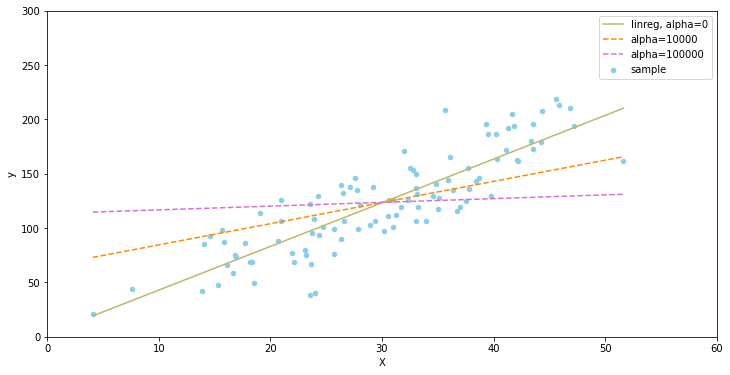

In [15]:
# Plotting for different alpha values. Observe how as alpha increases, the coefficient shrinks.
fig, ax = plt.subplots(figsize=(12,6))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax, color='SKYBLUE')

df_results1.plot(kind='line', x='X', y='y', ax=ax, color='DARKKHAKI')
df_results2.plot(kind='line', x='X', y='y', ax=ax, color='DARKORANGE', style='--')
df_results3.plot(kind='line', x='X', y='y', ax=ax, color='ORCHID', style='--')
ax.legend(['linreg, alpha=0','alpha=10000', 'alpha=100000', 'sample'])
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

#### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression) is another regularized form of Linear Regression. Like Ridge regression, it adds a regularization term to the cost function, but uses the $l_1$ norm of the weight vector instaed of  of the $l_2$ norm. 

(ISTL 6.2.2) Again from RSS use the RSS where $\text{RSS} (\Theta) = \sum_{i=1}^m \begin{pmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{pmatrix}^2$

The cost function , $J(\Theta)$ with the regularisation term, in terms of RSS is:

$$\begin{align}J(\Theta) &= \text{RSS} (\Theta) + \alpha \sum_{t=1}^n |\theta_t| \\&= \sum_{i=1}^m \begin{pmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{pmatrix}^2  + \alpha \sum_{t=1}^n |\theta_t|\end{align}$$

Similar to ridge regression, lasso shrinks the coefficient estimates towards zero. However, the $l_1$ penalty forces some of the coefficient estimates to be exactly equal to zero when $alpha$ is sufficiently large. So the lasso also performs variable selection. Hence, models from the lasso are generally much easier to interpret than those produced by ridge regression. The lasso yields sparse models, which are models that involve only a subset of the variables.

In [20]:
regb1 = Lasso(alpha=0.1)
regb1.fit(X_b, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
regb2 = Lasso(alpha=100)
regb2.fit(X_b, y)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lin_X_b1 = np.c_[np.ones((m,1)), lin_X]
predb1 = regb1.predict(lin_X_b1)
df_resultsb1 = pd.DataFrame({'X' : lin_X, 'y' : predb1})

predb2 = regb2.predict(lin_X_b1)
df_resultsb2 = pd.DataFrame({'X' : lin_X, 'y' : predb2})

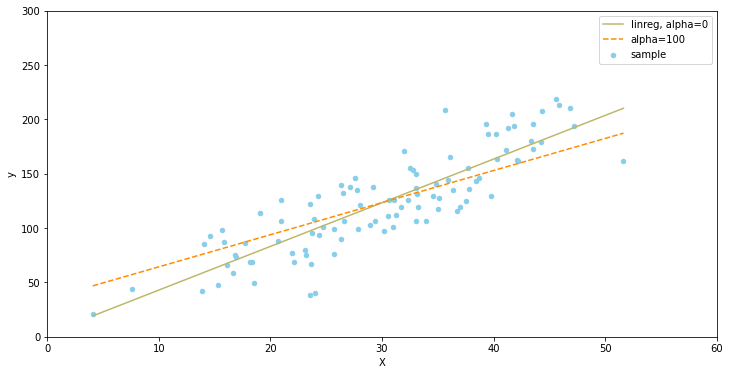

In [35]:
# Plotting for different alpha values. Observe how as alpha increases, the coefficient shrinks.
fig, ax = plt.subplots(figsize=(12,6))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax, color='SKYBLUE')

df_results1.plot(kind='line', x='X', y='y', ax=ax, color='DARKKHAKI')
df_resultsb2.plot(kind='line', x='X', y='y', ax=ax, color='DARKORANGE', style='--')
ax.legend(['linreg, alpha=0','alpha=100', 'sample'])
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

#### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularisation term is a mix of the both ridge and lasso regularisation term and you can control the mix ratio $r$. When $r=0$ Elastic net is equivalent to Ridge regression while when $r=1$ then Elastic net is equivalent to Lasso regression:


The cost function , $J(\Theta)$ in terms of RSS is:

$$\begin{align}J(\Theta) &= \text{RSS} (\Theta) + \alpha \sum_{t=1}^n |\theta_t| \\&= \sum_{i=1}^m \begin{pmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)}\end{pmatrix}^2  + r{\alpha} \sum_{t=1}^n \theta_t^2 + (1-r)\alpha \sum_{t=1}^n |\theta_t|\end{align}$$

In [38]:
regc1 = ElasticNet(alpha=0.1, l1_ratio=0.5)
regc1.fit(X_b, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)